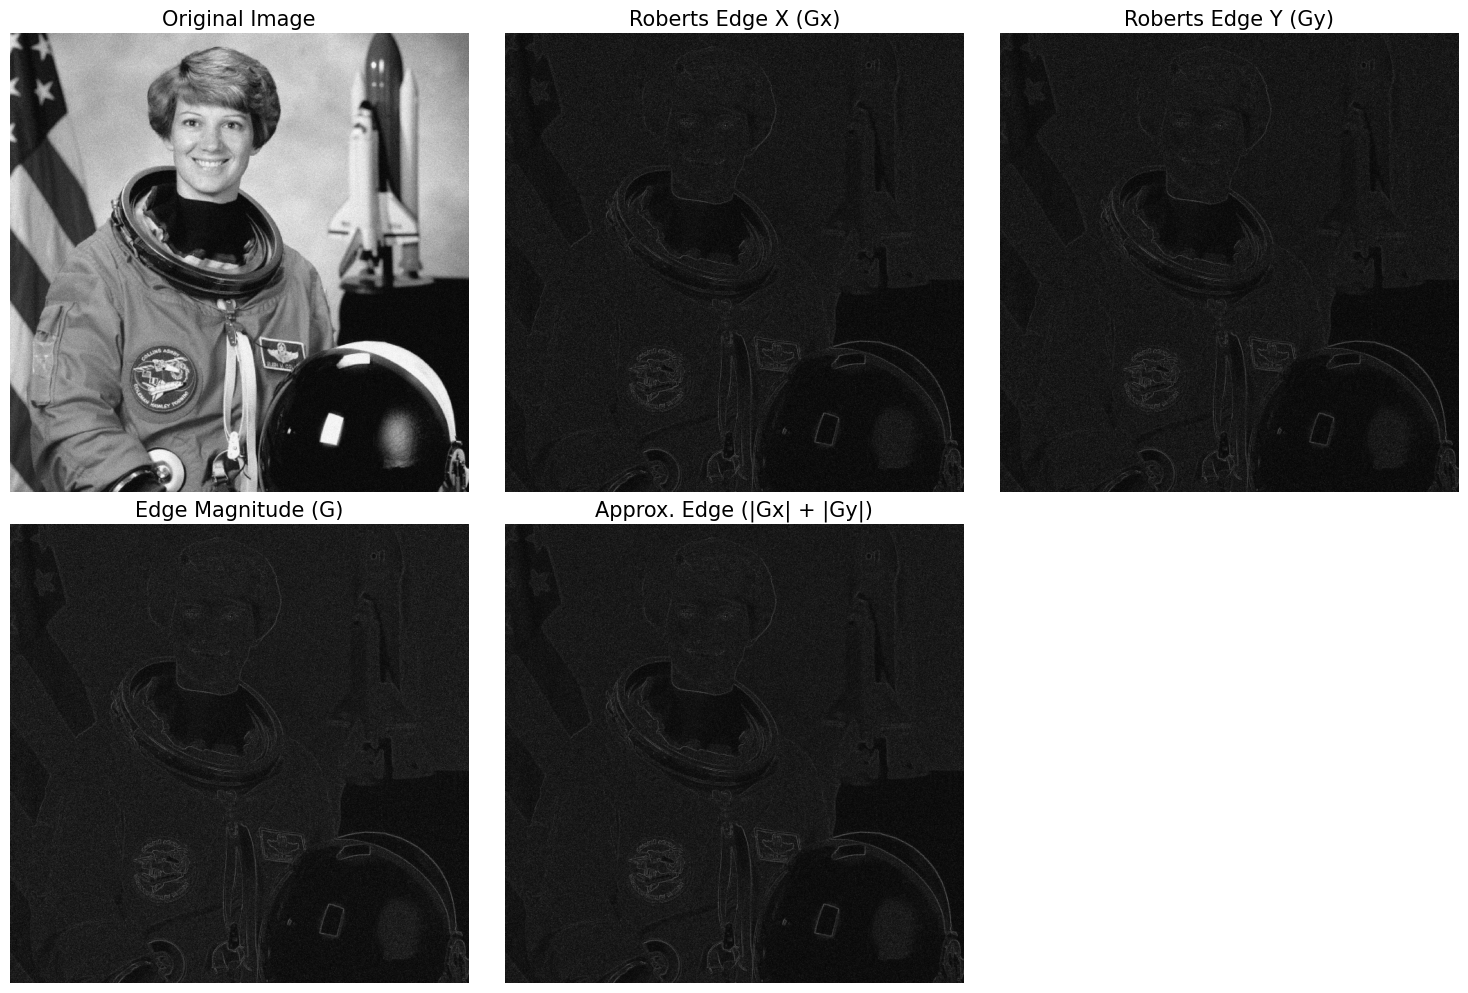

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 불러오기 (흑백 이미지로 변환)
image = cv2.imread('example.jpg', cv2.IMREAD_GRAYSCALE)

# 로버츠 마스크 정의
Gx = np.array([[1, 0],
               [0, -1]])  # x 방향

Gy = np.array([[0, 1],
               [-1, 0]])  # y 방향

# 마스크를 이용해 이미지 필터링 (convolution)
edge_x = cv2.filter2D(image, cv2.CV_64F, Gx)  # x 방향 에지
edge_y = cv2.filter2D(image, cv2.CV_64F, Gy)  # y 방향 에지

# 에지 크기 계산 (정확한 값)
edge_magnitude = np.sqrt(np.square(edge_x) + np.square(edge_y))
edge_magnitude = cv2.normalize(edge_magnitude, None, 0, 255, cv2.NORM_MINMAX)  # 정규화

# 에지 크기 근사값 계산 (|Gx| + |Gy|)
edge_approx = np.abs(edge_x) + np.abs(edge_y)
edge_approx = cv2.normalize(edge_approx, None, 0, 255, cv2.NORM_MINMAX)  # 정규화

# 결과 출력 (두 줄로 배치)
plt.figure(figsize=(15, 10))  # 전체 플롯 크기 조정

fs = 15  # 폰트 크기 설정

# 첫 번째 줄: 원본 이미지, Gx, Gy
plt.subplot(2, 3, 1)
plt.title("Original Image", fontsize=fs)
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title("Roberts Edge X (Gx)", fontsize=fs)
plt.imshow(np.abs(edge_x), cmap='gray')  # 절댓값으로 표시
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title("Roberts Edge Y (Gy)", fontsize=fs)
plt.imshow(np.abs(edge_y), cmap='gray')  # 절댓값으로 표시
plt.axis('off')

# 두 번째 줄: Edge Magnitude, Approximation
plt.subplot(2, 3, 4)
plt.title("Edge Magnitude (G)", fontsize=fs)
plt.imshow(edge_magnitude, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title("Approx. Edge (|Gx| + |Gy|)", fontsize=fs)
plt.imshow(edge_approx, cmap='gray')
plt.axis('off')

# 레이아웃 조정
plt.tight_layout()
plt.show()